<a href="https://colab.research.google.com/github/Pravallika41296/IANNWTF_Homework_Group24/blob/main/IANNWTF_Homework07_Group24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
%tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
import pandas as pd

from tensorflow.keras import layers, losses
from sklearn.manifold import TSNE 
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.io import output_notebook
from bokeh.plotting import figure, show, output_file
output_notebook()

In [2]:
(x_train, y_train), (x_test, y_test) =tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]
print (x_train.shape)
print (x_test.shape)


4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [4]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

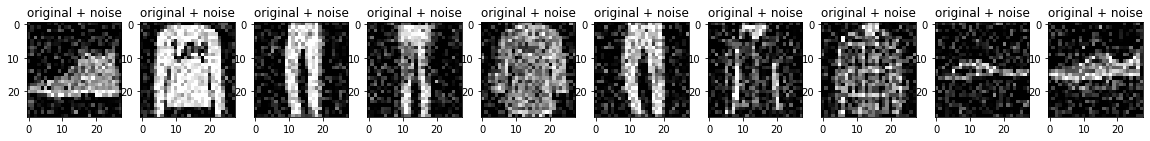

In [5]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

In [6]:
class Autoencoder(Model):
  def __init__(self):
    super(Autoencoder, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)), 
      layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


In [7]:
autoencoder = Autoencoder()

In [8]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [9]:
history = autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size = 64,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0211 - val_loss: 0.0084
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0072 - val_loss: 0.0063
Epoch 3/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0058 - val_loss: 0.0054
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0049 - val_loss: 0.0046
Epoch 5/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0043 - val_loss: 0.0041
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0038 - val_loss: 0.0037
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 8/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0028 - val_loss: 0.0028

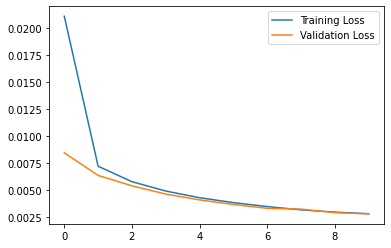

In [10]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

In [11]:
autoencoder.encoder.summary()
autoencoder.decoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 8)           1160      
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose (Conv2DTran (None, 14, 14, 8)         584       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 1)         145       
Total params: 1,897
Trainable pa

In [12]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

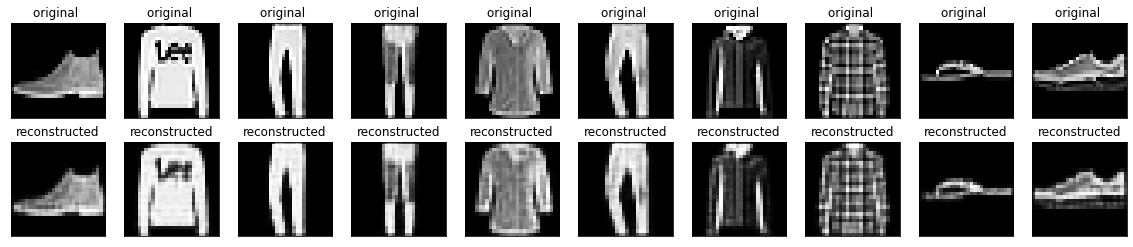

In [13]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original ")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

In [ ]:
test_images = np.array(x_test)
print(test_images.shape)
nsamples, nx, ny, _ = test_images.shape
d2_test_dataset = test_images.reshape((nsamples,nx*ny))
print(d2_test_dataset.shape)
test_images = d2_test_dataset[:1000]
tsne = TSNE(n_components=2, random_state=0)
tsne_fashion = tsne.fit_transform(test_images)
print(tsne_fashion)

In [22]:
test = []
y_test = y_test[:1000]
for i in range(len(y_test)):
  test.append(str(y_test[i]))
d = {'v' : test}
d = pd.DataFrame(d)
d = d['v'].map({'1': '#ff8000','2': '#40ff00','3': '#0080ff', '4':'#00ffbf', '5':'#ff0000', '6': '#EDBB99', '7': '#CD5C5C', '8': '#B7950B', '9':'#EDBB99', '0':'#A9DFBF'})
d = list(d)
print(d)


['#EDBB99', '#40ff00', '#ff8000', '#ff8000', '#EDBB99', '#ff8000', '#00ffbf', '#EDBB99', '#ff0000', '#CD5C5C', '#00ffbf', '#ff0000', '#CD5C5C', '#0080ff', '#00ffbf', '#ff8000', '#40ff00', '#00ffbf', '#B7950B', '#A9DFBF', '#40ff00', '#ff0000', '#CD5C5C', '#EDBB99', '#ff8000', '#00ffbf', '#EDBB99', '#A9DFBF', '#EDBB99', '#0080ff', '#B7950B', '#B7950B', '#0080ff', '#0080ff', '#B7950B', '#A9DFBF', '#CD5C5C', '#ff0000', '#CD5C5C', '#EDBB99', '#EDBB99', '#ff8000', '#0080ff', '#CD5C5C', '#EDBB99', '#CD5C5C', '#40ff00', '#ff8000', '#40ff00', '#40ff00', '#00ffbf', '#00ffbf', '#ff0000', '#B7950B', '#40ff00', '#40ff00', '#B7950B', '#00ffbf', '#B7950B', '#A9DFBF', '#CD5C5C', '#CD5C5C', '#B7950B', '#ff0000', '#ff8000', '#ff8000', '#40ff00', '#0080ff', '#EDBB99', '#B7950B', '#CD5C5C', '#A9DFBF', '#40ff00', '#EDBB99', '#40ff00', '#0080ff', '#ff8000', '#40ff00', '#B7950B', '#00ffbf', '#ff8000', '#B7950B', '#ff0000', '#EDBB99', '#ff0000', '#A9DFBF', '#0080ff', '#40ff00', '#A9DFBF', '#EDBB99', '#ff0000'

In [29]:
p = figure(title="Fashion")

source = ColumnDataSource(data=dict(x1=tsne_fashion[:,0],
                                    x2=tsne_fashion[:,1], color = d,
                                    names=tsne_fashion))

p.scatter(x="x1", y="x2", size=8, source=source, color="color")
show(p)